In [1]:
import gensim
from gensim import models
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from gensim.models import KeyedVectors
import numpy as np

In [2]:
vectors = KeyedVectors.load_word2vec_format('ODNB_model') 

In [3]:
vectors.most_similar(positive=['daughter'], negative=['woman'])

[('mcconnell', 0.6035376787185669),
 ('son', 0.5609935522079468),
 ('rhoff', 0.5577554106712341),
 ('baigent', 0.5551677942276001),
 ('grandson', 0.5479728579521179),
 ('curthoys', 0.5415471792221069),
 ('nevill', 0.5266011953353882),
 ('great-grandson', 0.5238231420516968),
 ('granddaughter', 0.5169771313667297),
 ('seaton', 0.5076237916946411)]

In [4]:
vectors.most_similar(['lawyer'], topn=30)

[('barrister', 0.7862745523452759),
 ('jurist', 0.7130719423294067),
 ('judge', 0.6892638802528381),
 ('politician', 0.6605442762374878),
 ('solicitor', 0.6320787668228149),
 ('attorney', 0.6268863081932068),
 ('diplomat', 0.6209093332290649),
 ('conveyancer', 0.6089402437210083),
 ('landowner', 0.6052453517913818),
 ('qc', 0.5843024849891663),
 ('businessman', 0.5711963176727295),
 ('financier', 0.5658173561096191),
 ('stenographer', 0.5622979998588562),
 ('theologian', 0.5620983242988586),
 ('courtier', 0.560833215713501),
 ('administrator', 0.5606969594955444),
 ('banker', 0.5598125457763672),
 ('historian', 0.5576694011688232),
 ('brewer', 0.5575767755508423),
 ('orientalist', 0.5556870698928833),
 ('office-holder', 0.5553045868873596),
 ('antiquary', 0.5468989610671997),
 ('philologist', 0.54655522108078),
 ('mathematician', 0.546329140663147),
 ('hebraist', 0.5452288389205933),
 ('memoirist', 0.5440307855606079),
 ('draftsman', 0.5404646396636963),
 ('classicist', 0.5362482666969

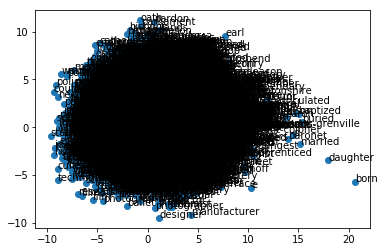

In [5]:
X = vectors[vectors.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.scatter(result[:, 0], result[:, 1])
words = list(vectors.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [6]:
vectors.vocab

{'first': <gensim.models.keyedvectors.Vocab at 0x10fd32828>,
 'london': <gensim.models.keyedvectors.Vocab at 0x10fd32be0>,
 'also': <gensim.models.keyedvectors.Vocab at 0x10fd32f98>,
 'one': <gensim.models.keyedvectors.Vocab at 0x10fd32e10>,
 'became': <gensim.models.keyedvectors.Vocab at 0x114ffbe48>,
 'years': <gensim.models.keyedvectors.Vocab at 0x10fd298d0>,
 'later': <gensim.models.keyedvectors.Vocab at 0x115036a20>,
 'two': <gensim.models.keyedvectors.Vocab at 0x11502c748>,
 'died': <gensim.models.keyedvectors.Vocab at 0x115820160>,
 'new': <gensim.models.keyedvectors.Vocab at 0x115820128>,
 'son': <gensim.models.keyedvectors.Vocab at 0x1158200f0>,
 'work': <gensim.models.keyedvectors.Vocab at 0x115820208>,
 'time': <gensim.models.keyedvectors.Vocab at 0x1158202b0>,
 'william': <gensim.models.keyedvectors.Vocab at 0x1158202e8>,
 'wife': <gensim.models.keyedvectors.Vocab at 0x115820358>,
 'made': <gensim.models.keyedvectors.Vocab at 0x115820390>,
 'may': <gensim.models.keyedvector

In [7]:
vectors.similarity('royalist', 'nazi')

0.24853486984390308

In [8]:
ordered_vocab = [(term, voc.index, voc.count) for term, voc in vectors.wv.vocab.items()]
ordered_vocab = sorted(ordered_vocab, key=lambda k: k[2])
ordered_terms, term_indices, term_counts = zip(*ordered_vocab)
df = pd.DataFrame(vectors.wv.syn0[term_indices, :], index=ordered_terms)

/Users/user/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if __name__ == '__main__':
/Users/user/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
/Users/user/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).


In [9]:
def plot_word_pairs(df, word_pairs, method="PCA"):
    """Plot a 2D projection of selected words and add 'relation' vectors between pairs"""
    words = list(set([w for pair in word_pairs for w in pair]))
    dfs = df.loc[words].copy()
    
    if method=="PCA":
        d = PCA(n_components=2)
    elif method=="TSNE":
        d = TSNE(n_components=2)
        
    results = d.fit_transform(dfs.iloc[:,:100])
    dfs['x'] = results[:,0]
    dfs['y'] = results[:,1]

    fig = plt.figure(figsize=(17,5), dpi=300)
    ax = fig.add_subplot(1,1,1)
    colors = plt.cm.Paired.colors
    for i in range(len(dfs)):
        ax.scatter(
            x=dfs.iloc[i]["x"],
            y=dfs.iloc[i]["y"],
            alpha=0.9,
            c=colors[i%10]
        )
        ax.text(
            x=dfs.iloc[i]["x"],
            y=dfs.iloc[i]["y"],
            s=words[i],
            color=colors[i%10]
        )

    for pair in word_pairs: 
        w1, w2 = pair
        w1x, w1y = dfs.loc[w1]["x"], dfs.loc[w1]["y"]
        w2x, w2y = dfs.loc[w2]["x"], dfs.loc[w2]["y"]
        vec = np.array([[w1x, w1y, w2x-w1x, w2y-w1y]])
        X, Y, U, V = zip(*vec)
        ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, width=0.002, color=colors[0])    
    plt.show()

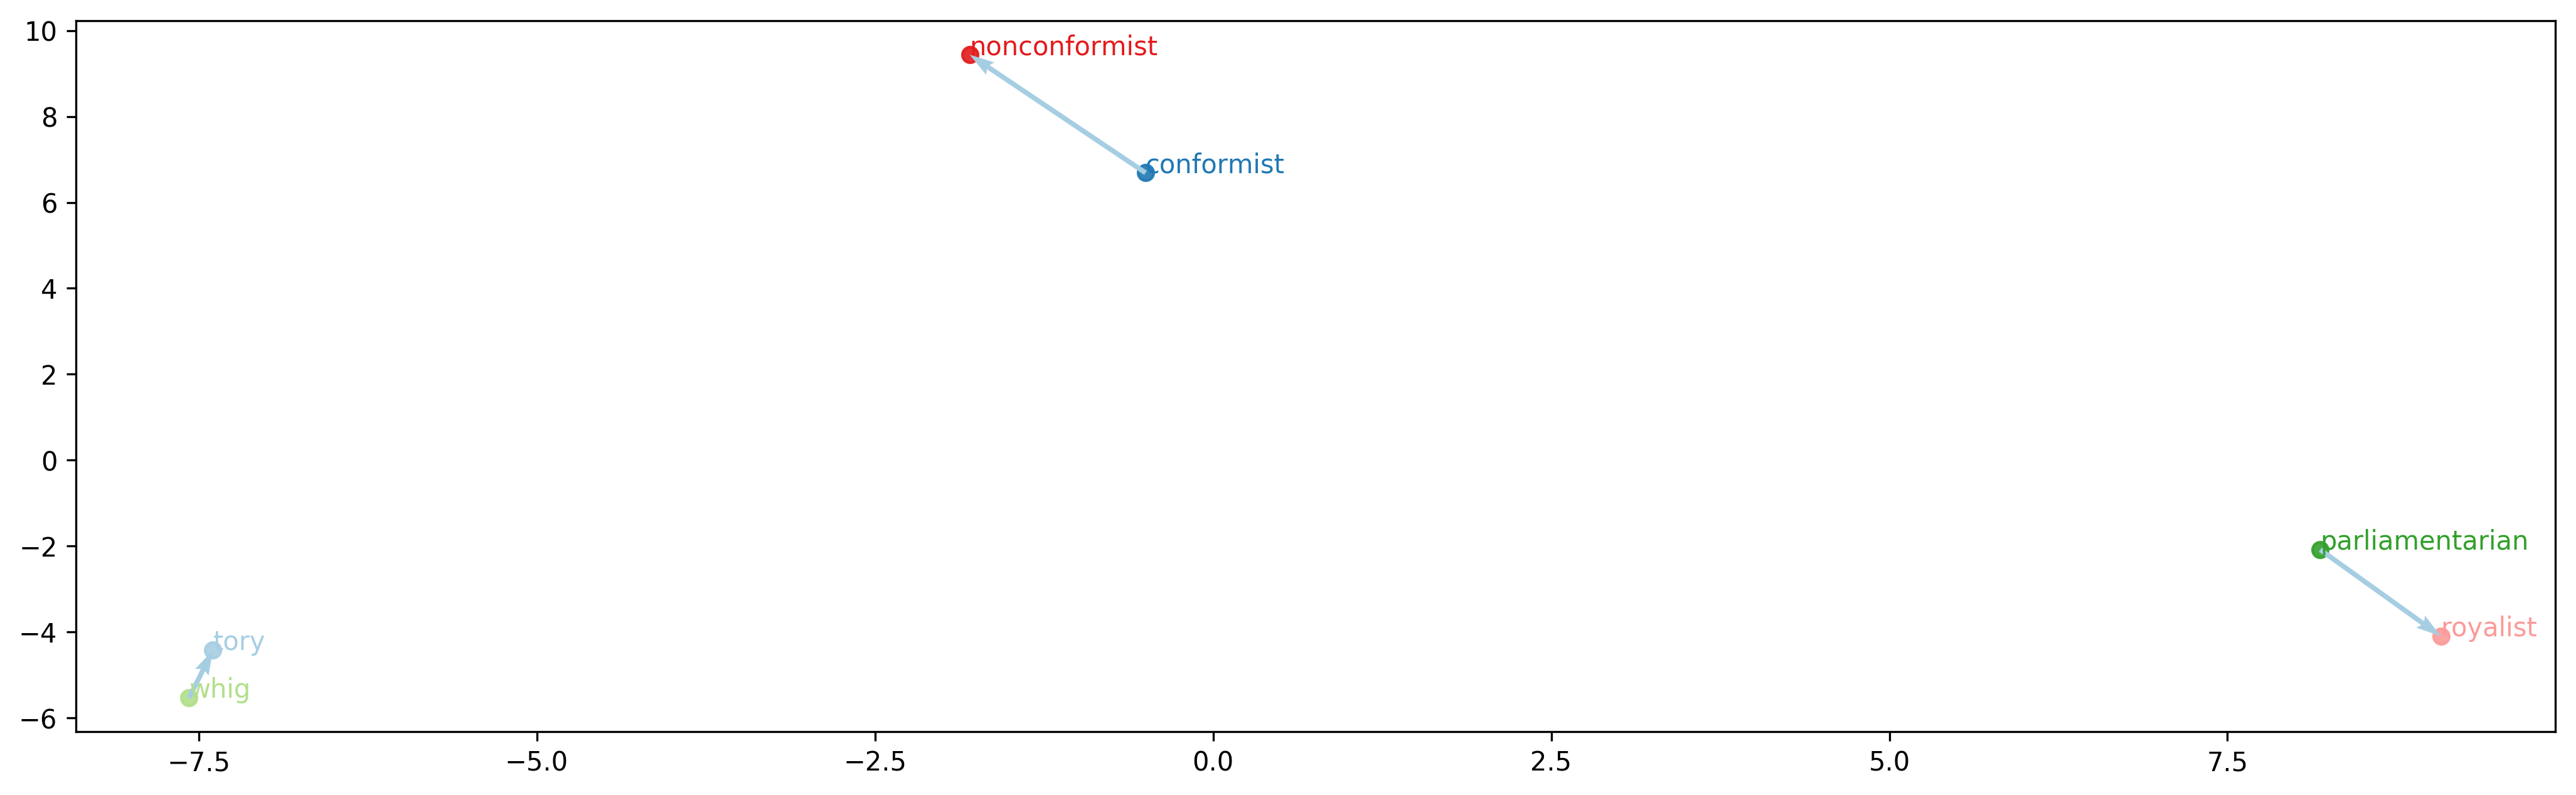

In [10]:
word_pairs = [
    #("man", "woman"), 
    #("boy", "girl"),
    #("king", "queen"),
    #("prince", "princess"),
    #("doctor", "nurse"), 
    #('london', 'parliament'),
    #('washington', 'congress'),
    #('jonson', 'shakespeare')
    #('prison', 'warden'),
    #('church', 'minister')
    ('parliamentarian', 'royalist'),
    ('whig', 'tory'),
    ('conformist', 'nonconformist')
]
plot_word_pairs(df, word_pairs, method="PCA")

In [11]:
words = list(set([w for pair in word_pairs for w in pair]))
dfs = df.loc[words].copy()
dfs

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
tory,-0.338825,0.480674,0.866825,-0.308055,1.091086,-0.983533,0.846429,-0.720413,-1.107669,-1.496958,...,0.982707,-2.906844,-1.706945,0.759123,-0.601927,-0.320421,-0.012486,1.132586,1.001624,-3.727452
conformist,-1.236656,-0.956112,-0.038156,-0.063280,0.520150,-0.238413,1.285511,0.546598,0.466315,-0.155518,...,-0.654682,-0.808914,-0.526006,0.618051,-0.071921,0.452011,-0.620855,1.073718,0.649551,-0.881419
whig,0.476592,-0.156145,0.657377,0.275096,1.914059,-0.843546,1.413820,-1.290140,-1.473235,-0.665415,...,1.676785,-2.825568,-2.264904,1.102174,-0.106383,0.382502,-1.163776,-0.033302,1.365011,-4.292543
parliamentarian,-0.833257,0.441520,-0.424148,0.665791,3.135293,-2.715301,1.223029,-0.609991,-0.012145,-0.548118,...,3.206905,-2.735124,-0.597333,2.284786,1.382861,-1.713255,0.672557,1.538092,-1.345127,-1.564700
royalist,-0.274271,0.899204,1.972963,1.041657,2.462626,-4.180554,2.203917,0.001403,-0.522428,-0.524144,...,1.952356,-2.002713,-1.166810,2.598358,0.920364,-0.964458,0.567914,0.297657,-0.927574,-2.142869
nonconformist,-0.893600,0.242013,-0.629590,0.304591,1.047369,-0.607596,2.612040,0.297908,-0.625153,1.264796,...,1.022790,-1.699151,-0.405244,1.992324,1.419061,2.746846,1.179847,3.025995,0.234135,-2.527696
